<a href="https://colab.research.google.com/github/avinashkr29/Visualisations/blob/master/Hackerrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Function to increase width of cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas_profiling
import numpy as np
%matplotlib inline

In [2]:
import os
os.listdir()

['.config', 'sample_submission.csv', 'Test.csv', 'Train.csv', 'sample_data']

In [3]:
df=pd.read_csv(r'Train.csv')

In [4]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [6]:
df['INCIDENT_No']=df['INCIDENT_ID'].map(lambda x: x[x.find('_')+1:])

In [7]:
df['DATE']=pd.to_datetime(df['DATE'])
df['Month']=df['DATE'].dt.month
df['Year']=df['DATE'].dt.year
df['Day']=df['DATE'].dt.weekday

In [8]:
df['X_12']=df['X_12'].fillna(df.X_12.median())

In [9]:
!pip install pycaret

     |████████████████████████████████| 194kB 4.9MB/s 
     |████████████████████████████████| 1.6MB 9.8MB/s 
     |████████████████████████████████| 133kB 16.5MB/s 
     |████████████████████████████████| 389kB 20.5MB/s 
     |████████████████████████████████| 1.2MB 30.8MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 63.9MB 64kB/s 
     |████████████████████████████████| 7.0MB 26.1MB/s 
     |████████████████████████████████| 266kB 42.0MB/s 
     |████████████████████████████████| 3.2MB 40.3MB/s 
     |████████████████████████████████| 552kB 37.5MB/s 
     |████████████████████████████████| 604kB 39.4MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 2.1MB 39.8MB/s 
     |████████████████████████████████| 235kB 42.8MB/s 
     |████████████████████████████████| 6.3MB 27.0MB/s 
 

In [10]:
from pycaret.classification import *

In [11]:
for i in [ 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7','X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'Month', 'Year', 'Day']:
    df[i]=df[i].astype(int)

In [14]:
exp_clf102 = setup(data = df[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'Month', 'Year', 'Day','MULTIPLE_OFFENSE']], target = 'MULTIPLE_OFFENSE', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(23856, 19)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.998800,0.999900,0.999700,0.999100,0.999400,0.985900
1,CatBoost Classifier,0.998800,0.999900,0.999700,0.999000,0.999400,0.985800
2,Light Gradient Boosting Machine,0.998300,1.000000,0.999600,0.998600,0.999100,0.979300
3,Decision Tree Classifier,0.998000,0.986200,0.999200,0.998700,0.999000,0.976800
4,Extreme Gradient Boosting,0.998000,0.999700,0.999500,0.998400,0.998900,0.975800
5,Ada Boost Classifier,0.995900,0.998500,0.999400,0.996300,0.997900,0.950600
6,Random Forest Classifier,0.982600,0.984100,0.996800,0.985200,0.991000,0.769200
7,Extra Trees Classifier,0.973500,0.992900,0.998900,0.974000,0.986300,0.580400
8,K Neighbors Classifier,0.967400,0.921400,0.992900,0.973500,0.983100,0.521800
9,Ridge Classifier,0.955200,0.000000,1.000000,0.955200,0.977100,0.000000


In [16]:
# df['inverted_target']=df['MULTIPLE_OFFENSE'].map(lambda x: 0 if x==1 else 1)

In [18]:
# exp_clf102 = setup(data = df[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
#        'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'Month', 'Year', 'Day','inverted_target']], target = 'inverted_target', session_id=123,
#                   normalize = True, 
#         transformation = True, 
#                   ignore_low_variance = True,
#                   remove_multicollinearity = True, multicollinearity_threshold = 0.95)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(23856, 19)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.999400,0.999800,0.986600,1.000000,0.993200,0.992900
1,Light Gradient Boosting Machine,0.998900,0.999800,0.979900,0.994700,0.987100,0.986500
2,Extreme Gradient Boosting,0.998500,0.999700,0.971900,0.994600,0.983000,0.982200
3,Gradient Boosting Classifier,0.998400,0.999900,0.969300,0.994500,0.981600,0.980800
4,Decision Tree Classifier,0.998000,0.987500,0.975900,0.980300,0.977800,0.976800
5,Ada Boost Classifier,0.995700,0.998200,0.926500,0.976200,0.950500,0.948300
6,Random Forest Classifier,0.980800,0.985200,0.590800,0.968700,0.732000,0.722800
7,Extra Trees Classifier,0.973200,0.992600,0.413000,0.971900,0.577800,0.566300
8,K Neighbors Classifier,0.966500,0.912600,0.410300,0.717900,0.520900,0.504900
9,Ridge Classifier,0.955200,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
# tuning LightGBM Model
tuned_catboost=tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
1,0.9988,0.9999,0.9733,1.0,0.9865,0.9859
2,0.9988,1.0000,0.9733,1.0,0.9865,0.9859
3,0.9994,1.0000,0.9867,1.0,0.9933,0.9930
4,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0,1.0000,1.0000
6,0.9988,0.9988,0.9733,1.0,0.9865,0.9859
7,0.9994,0.9996,0.9867,1.0,0.9933,0.9930
8,0.9982,1.0000,0.9600,1.0,0.9796,0.9787
9,0.9994,1.0000,0.9865,1.0,0.9932,0.9929


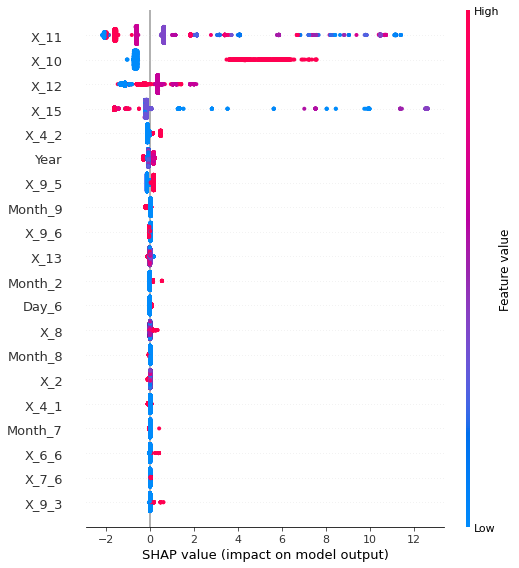

In [30]:
interpret_model(tuned_catboost, plot = 'summary', feature = None, observation = None)

In [31]:
finalize_model(tuned_catboost)

In [32]:
df=pd.read_csv(r'Test.csv')

In [34]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [35]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


In [36]:
df['INCIDENT_No']=df['INCIDENT_ID'].map(lambda x: x[x.find('_')+1:])

In [37]:
df['DATE']=pd.to_datetime(df['DATE'])
df['Month']=df['DATE'].dt.month
df['Year']=df['DATE'].dt.year
df['Day']=df['DATE'].dt.weekday

In [42]:
df['X_12']=df['X_12'].fillna(df.X_12.median())
for i in [ 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7','X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'Month', 'Year', 'Day']:
    df[i]=df[i].astype(int)

In [47]:
predictions = predict_model(tuned_catboost, data = df)

In [52]:
predictions['Label']=predictions['Label'].map(lambda x: 0 if x==1 else 1)

In [54]:
predictions[['INCIDENT_ID','Label']].to_csv('Submission_1.csv',index=False)

In [57]:
!git remote add origin https://github.com/avinashkr29/Colab

fatal: not a git repository (or any of the parent directories): .git
